In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json
import numpy as np
import time

In [2]:
# Create a reference the CSV file desired

csv_path = "inpatientCharges.csv"

In [3]:
# Read the CSV into a Pandas DataFrame
DataFrame = pd.read_csv(csv_path)


In [4]:
# Display top 5 rows of dataframe for reference
DataFrame.head(5)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


In [5]:
# Display a statistical overview of the DataFrame for reference

DataFrame.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.954224,9707.473804,8494.490964
std,151563.671767,27854.323080,51.104042,35065.365931,7664.642598,7309.467261
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.900000
25%,110092.000000,27261.000000,17.000000,15947.160000,5234.500000,4192.350000
50%,250007.000000,44309.000000,27.000000,25245.820000,7214.100000,6158.460000
75%,380075.000000,72901.000000,49.000000,43232.590000,11286.400000,10056.880000
max,670077.000000,99835.000000,3383.000000,929118.900000,156158.180000,154620.810000


In [6]:
# Check to see if there are any incomplete rows
DataFrame.count()

DRG Definition                          163065
Provider Id                             163065
Provider Name                           163065
Provider Street Address                 163065
Provider City                           163065
Provider State                          163065
Provider Zip Code                       163065
Hospital Referral Region Description    163065
 Total Discharges                       163065
 Average Covered Charges                163065
 Average Total Payments                 163065
Average Medicare Payments               163065
dtype: int64

In [7]:
# Calculate the Number of Unique Diagnosis Related Groups (DRGs): 
Unique_DRGs = len(DataFrame["DRG Definition"].unique())
Unique_DRGs

100

In [8]:
# Calculate the Number of Unique Providers: 
Unique_Provider_count = len(DataFrame["Provider Id"].unique())
Unique_Provider_count 

3337

In [9]:
# Calculate the Total Number of Unique States in the DataFrame
Unique_State_Count = len(DataFrame["Provider State"].unique())
Unique_State_Count

51

In [10]:
# Calculate the Total Number of Unique Provider Zip Codes in the DataFrame
Unique_Provider_ZipCode_Count = len(DataFrame["Provider Zip Code"].unique())
Unique_Provider_ZipCode_Count

3053

In [11]:
# Calculate the Unique Number of hospital_referral_region_description in the DataFrame
Unique_Hospital_Referral_Region_count = len(DataFrame["Hospital Referral Region Description"].unique())
Unique_Hospital_Referral_Region_count

306

In [12]:
# Observe the DataTypes of each column
DataFrame.dtypes

DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Provider Zip Code                         int64
Hospital Referral Region Description     object
 Total Discharges                         int64
 Average Covered Charges                float64
 Average Total Payments                 float64
Average Medicare Payments               float64
dtype: object

In [16]:
# # Use pd.to_numeric() method to convert the datatype of the Discharge Count column
DataFrame["Total Discharges"] = pd.to_numeric(DataFrame[" Total Discharges "])

# # Use pd.to_numeric() method to convert the datatype of the Average Covered Charges column
DataFrame[" Average Covered Charges "] = pd.to_numeric(DataFrame[" Average Covered Charges "])

# # Use pd.to_numeric() method to convert the datatype of the Average Medicare Payments column
DataFrame['Average Medicare Payments'] = pd.to_numeric(DataFrame['Average Medicare Payments'])

# Use pd.to_numeric() method to convert the datatype of the Average Medicare Payments column
DataFrame['Average Medicare Payments'] = pd.to_numeric(DataFrame['Average Medicare Payments'])

# Use pd.to_numeric() method to convert the datatype of the Average Medicare Payments 2 column
DataFrame['Average Medicare Payments 2'] = pd.to_numeric(DataFrame['Average Medicare Payments 2'])

KeyError: 'Average Medicare Payments 2'

In [14]:
# Observe the updated DataTypes of each column
DataFrame.dtypes

DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Provider Zip Code                         int64
Hospital Referral Region Description     object
 Total Discharges                         int64
 Average Covered Charges                float64
 Average Total Payments                 float64
Average Medicare Payments               float64
dtype: object

In [15]:
# Verify that the Discharge column datatype has been made numeric
DataFrame['Total Discharges'].dtype

# Observe the updated DataTypes of each column
DataFrame.dtypes

KeyError: 'Total Discharges'

In [ ]:
# Calculate the Total Number of Discharges in the DataFrame
Discharge_Count = (DataFrame["Total Discharges"].sum())
Discharge_Count

In [ ]:
# Calculate the average covered charges amount
Average_Covered_Charges = DataFrame["Average Covered Charges"].mean()
Average_Covered_Charges

In [ ]:
# Cacluate the max covered charge amount
Max_Covered_Charges = DataFrame["Average Covered Charges"].max()
Max_Covered_Charges

In [ ]:
# Cacluate the min covered charge amount
Min_Covered_Charges = DataFrame["Average Covered Charges"].min()
Min_Covered_Charges

In [14]:
# Create a summary data frame to hold the Analysis Results

DRG_Analysis_df = pd.DataFrame([
    {"Unique DRGs": Unique_DRGs, 
     "Unique Providers": Unique_Provider_count, 
     "Unique Provider States": Unique_State_Count, 
     "Unique Provider Zip Codes": Unique_Provider_ZipCode_Count, 
     "Unique Regions": Unique_Hospital_Referral_Region_count,
     "Total Discharge Count": Discharge_Count,
     "Average Charge": Average_Covered_Charges,
     "Max Charge": Max_Covered_Charges,
     "Min Charge": Min_Covered_Charges
    }
])
DRG_Analysis_df

NameError: name 'Discharge_Count' is not defined

In [15]:
# Give the displayed data cleaner formatting

DRG_Analysis_Formatted_df = DRG_Analysis_df

DRG_Analysis_Formatted_df["Average Charge"] = DRG_Analysis_df["Average Charge"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df["Max Charge"] = DRG_Analysis_df["Max Charge"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df["Min Charge"] = DRG_Analysis_df["Min Charge"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df

NameError: name 'DRG_Analysis_df' is not defined

In [16]:

# Filter the data so that only TN data is in the dataframe

DataFrame_TN = DataFrame.loc[DataFrame["Provider State"] == "TN", :]

DataFrame_TN.head(50)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges
879,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,44,$19872.77,$6355.88,$4957.81,44
881,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440006,SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,11,$41660.09,$6186.81,$5266.45,11
882,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440011,BLOUNT MEMORIAL HOSPITAL,907 E LAMAR ALEXANDER PARKWAY,MARYVILLE,TN,37804,TN - Knoxville,13,$23726.38,$5176.76,$4318.30,13
883,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440012,WELLMONT BRISTOL REGIONAL MEDICAL CENTER,ONE MEDICAL PARK BLVD,BRISTOL,TN,37620,TN - Kingsport,14,$16276.78,$5571.78,$4603.78,14
884,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440015,UNIVERSITY OF TN MEMORIAL HOSPITAL,1924 ALCOA HIGHWAY,KNOXVILLE,TN,37920,TN - Knoxville,41,$19589.43,$6720.24,$5632.00,41
885,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440017,WELLMONT HOLSTON VALLEY MEDICAL CENTER,130 WEST RAVINE ROAD,KINGSPORT,TN,37662,TN - Kingsport,28,$20252.03,$5809.64,$4595.82,28
886,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440029,WILLIAMSON MEDICAL CENTER,4321 CAROTHERS PARKWAY,FRANKLIN,TN,37067,TN - Nashville,23,$20155.47,$5723.65,$4303.86,23
887,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440030,MORRISTOWN HAMBLEN HOSPITAL ASSOCIATION,908 W 4TH NORTH ST,MORRISTOWN,TN,37814,TN - Knoxville,16,$10904.81,$5612.12,$4629.62,16
888,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440034,METHODIST MEDICAL CENTER OF OAK RIDGE,990 OAK RIDGE TURNPIKE BOX 529,OAK RIDGE,TN,37830,TN - Knoxville,40,$12203.65,$5220.60,$4170.75,40
889,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440035,GATEWAY MEDICAL CENTER,651 DUNLOP LANE,CLARKSVILLE,TN,37040,TN - Nashville,20,$27194.25,$6021.85,$4833.30,20


In [17]:
# Display a statistical overview of the TN DataFrame for reference

DataFrame_TN.describe()

,Provider Id,Provider Zip Code,Total Discharges,Total Discharges
count,4168.000000,4168.000000,4168.000000,4168.000000
mean,440088.813820,37707.079415,45.361084,45.361084
std,63.857754,463.599318,54.839946,54.839946
min,440001.000000,37030.000000,11.000000,11.000000
25%,440034.000000,37236.000000,17.000000,17.000000
50%,440072.000000,37743.000000,27.000000,27.000000
75%,440150.000000,38104.000000,53.000000,53.000000
max,440228.000000,38583.000000,808.000000,808.000000


In [18]:

# Calculate the Number of Unique Diagnosis Related Groups (DRGs): 
Unique_DRGs_TN = len(DataFrame_TN["DRG Definition"].unique())
Unique_DRGs_TN

100

In [19]:
# Calculate the Number of Unique Providers in TN: 
Unique_Provider_count_TN = len(DataFrame_TN["Provider Id"].unique())
Unique_Provider_count_TN

97

In [20]:
# Calculate the Unique Number of hospital_referral_region_description in TN 
Unique_Hospital_Referral_Region_count_TN = len(DataFrame_TN["Hospital Referral Region Description"].unique())
Unique_Hospital_Referral_Region_count_TN

8

In [21]:
# Calculate the Total Number of Discharges in TN 
Discharge_Count_TN = (DataFrame_TN["Total Discharges"].sum())
Discharge_Count_TN

189065

In [22]:

# Cacluate the average covered charges amount in TN
Average_Covered_Charges_TN = DataFrame_TN["Average Covered Charges"].mean()
Average_Covered_Charges_TN

KeyError: 'Average Covered Charges'

In [ ]:

# Cacluate the max covered charge amount in TN
Max_Covered_Charges_TN = DataFrame_TN["Average Covered Charges"].max()
Max_Covered_Charges_TN

In [23]:

# Cacluate the min covered charge amount in TN
Min_Covered_Charges_TN = DataFrame_TN["Average Covered Charges"].min()
Min_Covered_Charges_TN

KeyError: 'Average Covered Charges'

In [24]:
# Calculate the Total Number of Unique Provider Zip Codes in TN 
Unique_Provider_ZipCode_Count_TN = len(DataFrame_TN["Provider Zip Code"].unique())
Unique_Provider_ZipCode_Count_TN

94

In [25]:
# Create a summary data frame to hold the Analysis Results

DRG_Analysis_df_TN = pd.DataFrame([
    {"Unique DRGs in TN": Unique_DRGs_TN, 
     "Unique Providers in TN": Unique_Provider_count_TN, 
     "Unique Provider Zip Codes in TN": Unique_Provider_ZipCode_Count_TN, 
     "Unique Regions in TN": Unique_Hospital_Referral_Region_count_TN,
     "Total Discharge Count in TN": Discharge_Count_TN,
     "Average Charge in TN": Average_Covered_Charges_TN,
     "Max Charge in TN": Max_Covered_Charges_TN,
     "Min Charge in TN": Min_Covered_Charges_TN
    }
])
DRG_Analysis_df_TN

NameError: name 'Average_Covered_Charges_TN' is not defined

In [26]:
# Give the displayed data cleaner formatting

DRG_Analysis_Formatted_df_TN = DRG_Analysis_df_TN

DRG_Analysis_Formatted_df_TN["Average Charge in TN"] = DRG_Analysis_df_TN["Average Charge in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN["Max Charge in TN"] = DRG_Analysis_df_TN["Max Charge in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN["Min Charge in TN"] = DRG_Analysis_df_TN["Min Charge in TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_TN

NameError: name 'DRG_Analysis_df_TN' is not defined

In [27]:
# Filter the data so that only TN - Nashville data is in the dataframe

DataFrame_TN_Nashville = DataFrame.loc[DataFrame["Hospital Referral Region Description"] == "TN - Nashville", :]

DataFrame_TN_Nashville.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges
401,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,180013,THE MEDICAL CENTER AT BOWLING GREEN,250 PARK STREET,BOWLING GREEN,KY,42101,TN - Nashville,65,$18149.16,$6416.32,$5282.30,65
408,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,180051,JENNIE STUART MEDICAL CENTER,320 WEST 18TH STREET,HOPKINSVILLE,KY,42240,TN - Nashville,14,$15505.00,$5833.35,$4955.35,14
881,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440006,SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,11,$41660.09,$6186.81,$5266.45,11
886,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440029,WILLIAMSON MEDICAL CENTER,4321 CAROTHERS PARKWAY,FRANKLIN,TN,37067,TN - Nashville,23,$20155.47,$5723.65,$4303.86,23
889,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,440035,GATEWAY MEDICAL CENTER,651 DUNLOP LANE,CLARKSVILLE,TN,37040,TN - Nashville,20,$27194.25,$6021.85,$4833.30,20


In [28]:
# Display a statistical overview of the TN - Nashville DataFrame for reference

DataFrame_TN_Nashville.describe()

,Provider Id,Provider Zip Code,Total Discharges,Total Discharges
count,1885.000000,1885.000000,1885.000000,1885.000000
mean,408086.485942,38071.141114,39.967639,39.967639
std,85454.332559,1629.541402,43.051203,43.051203
min,180004.000000,37030.000000,11.000000,11.000000
25%,440029.000000,37129.000000,16.000000,16.000000
50%,440059.000000,37232.000000,26.000000,26.000000
75%,440144.000000,38501.000000,47.000000,47.000000
max,440227.000000,42345.000000,738.000000,738.000000


In [29]:
# Calculate the Number of Unique Diagnosis Related Groups (DRGs) in TN - Nashville
Unique_DRGs_TN_Nashville = len(DataFrame_TN_Nashville["DRG Definition"].unique())
Unique_DRGs_TN_Nashville

100

In [30]:

# Calculate the Number of Unique Providers in TN - Nashville
Unique_Provider_count_TN_Nashville = len(DataFrame_TN_Nashville["Provider Id"].unique())
Unique_Provider_count_TN_Nashville

42

In [31]:

# Calculate the Total Number of Discharges in TN - Nashville
Discharge_Count_TN_Nashville = (DataFrame_TN_Nashville["Total Discharges"].sum())
Discharge_Count_TN_Nashville

75339

In [32]:
# Cacluate the average covered charges amount in TN - Nashville
Average_Covered_Charges_TN_Nashville = DataFrame_TN_Nashville["Average Covered Charges"].mean()
Average_Covered_Charges_TN_Nashville

KeyError: 'Average Covered Charges'

In [33]:
# Cacluate the max covered charge amount in TN - Nashville
Max_Covered_Charges_TN_Nashville = DataFrame_TN_Nashville["Average Covered Charges"].max()
Max_Covered_Charges_TN_Nashville

KeyError: 'Average Covered Charges'

In [34]:
Min_Covered_Charges_TN_Nashville = DataFrame_TN_Nashville["Average Covered Charges"].min()
Min_Covered_Charges_TN_Nashville

KeyError: 'Average Covered Charges'

In [35]:

# Calculate the Total Number of Unique Provider Zip Codes in TN - Nashville
Unique_Provider_ZipCode_Count_TN_Nashville = len(DataFrame_TN_Nashville["Provider Zip Code"].unique())
Unique_Provider_ZipCode_Count_TN_Nashville

41

In [36]:
# Create a summary data frame to hold the DRG Analysis Results for TN - Nashville

DRG_Analysis_df_TN_Nashville = pd.DataFrame([
    {"Unique DRGs in Nashville": Unique_DRGs_TN_Nashville, 
     "Unique Providers in Nashville": Unique_Provider_count_TN_Nashville, 
     "Unique Provider Zip Codes in Nashville": Unique_Provider_ZipCode_Count_TN_Nashville, 
     "Total Discharge Count in Nashville": Discharge_Count_TN_Nashville,
     "Average Charge in Nashville": Average_Covered_Charges_TN_Nashville,
     "Max Charge in Nashville": Max_Covered_Charges_TN_Nashville,
     "Min Charge in Nashville": Min_Covered_Charges_TN_Nashville
    }
])
DRG_Analysis_df_TN_Nashville

NameError: name 'Average_Covered_Charges_TN_Nashville' is not defined

In [37]:
# Give the displayed data cleaner formatting

DRG_Analysis_Formatted_df_TN_Nashville = DRG_Analysis_df_TN_Nashville

DRG_Analysis_Formatted_df_TN_Nashville["Average Charge in Nashville"] = DRG_Analysis_df_TN_Nashville["Average Charge in Nashville"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN_Nashville["Max Charge in Nashville"] = DRG_Analysis_df_TN_Nashville["Max Charge in Nashville"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN_Nashville["Min Charge in Nashville"] = DRG_Analysis_df_TN_Nashville["Min Charge in Nashville"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_TN_Nashville

NameError: name 'DRG_Analysis_df_TN_Nashville' is not defined

In [38]:

# Filter the data so that only a specific procedure is in the dataframe

DataFrame_drg_HEART_FAILURE = DataFrame.loc[DataFrame["DRG Definition"] == "291 - HEART FAILURE & SHOCK W MCC", :]

DataFrame_drg_HEART_FAILURE.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges
41254,291 - HEART FAILURE & SHOCK W MCC,110028,UNIVERSITY HOSPITAL,1350 WALTON WAY,AUGUSTA,GA,30901,GA - Augusta,163,$31462.46,$9090.06,$8390.92,163
41281,291 - HEART FAILURE & SHOCK W MCC,110091,ROCKDALE MEDICAL CENTER,"1412 MILSTEAD AVENUE, NE",CONYERS,GA,30012,GA - Atlanta,89,$24585.56,$9543.67,$8951.86,89
41334,291 - HEART FAILURE & SHOCK W MCC,110092,DODGE COUNTY HOSPITAL,901 GRIFFIN AVE,EASTMAN,GA,31023,GA - Macon,25,$16207.48,$9052.08,$8504.12,25
41520,291 - HEART FAILURE & SHOCK W MCC,140007,PROVENA ST JOSEPH MEDICAL CENTER,333 N MADISON,JOLIET,IL,60435,IL - Joliet,259,$43910.33,$9063.49,$8383.55,259
41653,291 - HEART FAILURE & SHOCK W MCC,140080,RHC ST FRANCIS HOSPITAL,355 RIDGE AVE,EVANSTON,IL,60202,IL - Evanston,54,$44448.51,$12957.85,$11001.01,54


In [39]:
# Display a statistical overview of the HEART FAILURE PROCEDURES DataFrame for reference

DataFrame_drg_HEART_FAILURE.describe()

,Provider Id,Provider Zip Code,Total Discharges,Total Discharges
count,2687.000000,2687.000000,2687.000000,2687.000000
mean,257352.486044,49080.231113,69.072944,69.072944
std,154218.797546,27834.089305,59.648904,59.648904
min,10001.000000,1040.000000,11.000000,11.000000
25%,110123.000000,28220.000000,26.000000,26.000000
50%,250050.000000,45373.000000,51.000000,51.000000
75%,390042.500000,74104.000000,92.000000,92.000000
max,670068.000000,99701.000000,603.000000,603.000000


In [40]:
# Calculate the Number of Unique Providers that serviced DRG HEART_FAILURE PROCEDURES
Unique_Provider_count_drg_HEART_FAILURE = len(DataFrame_drg_HEART_FAILURE["Provider Id"].unique())
Unique_Provider_count_drg_HEART_FAILURE

2687

In [41]:
# Calculate the Unique Number of hospital_referral_region_description that serviced DRG HEART_FAILURE PROCEDURES in the DataFrame
Unique_Hospital_Referral_Region_count_drg_HEART_FAILURE = len(DataFrame_drg_EXTRACRANIAL["Hospital Referral Region Description"].unique())
Unique_Hospital_Referral_Region_count_drg_HEART_FAILURE

NameError: name 'DataFrame_drg_EXTRACRANIAL' is not defined

In [42]:
# Calculate the Total Number of Discharges for DRG EXTRACRANIAL PROCEDURES in the DataFrame
Discharge_Count_drg_HEART_FAILURE = (DataFrame_drg_HEART_FAILURE["Total Discharges"].sum())
Discharge_Count_drg_HEART_FAILURE

185599

In [43]:
# Cacluate the average covered charges for DRG HEART_FAILURE PROCEDURES
Average_Covered_Charges_drg_HEART_FAILURE = DataFrame_drg_HEART_FAILURE["Average Covered Charges"].mean()
Average_Covered_Charges_drg_HEART_FAILURE

KeyError: 'Average Covered Charges'

In [44]:
# Cacluate the max covered charge amount for DRG HEART_FAILURE PROCEDURES

Max_Covered_Charges_drg_HEART_FAILURE = DataFrame_drg_HEART_FAILURE["Average Covered Charges"].max()
Max_Covered_Charges_drg_HEART_FAILURE

KeyError: 'Average Covered Charges'

In [45]:
# Cacluate the min covered charge amount for DRG HEART_FAILURE PROCEDURES

Min_Covered_Charges_drg_HEART_FAILURE = DataFrame_drg_EXTRACRANIAL["Average Covered Charges"].min()
Min_Covered_Charges_drg_HEART_FAILURE

NameError: name 'DataFrame_drg_EXTRACRANIAL' is not defined

In [46]:

# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE = len(DataFrame_drg_HEART_FAILURE["Provider Zip Code"].unique())
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE

2523

In [47]:

# Create a summary data frame to hold the DRG HEART_FAILURE PROCEDURES Analysis Results

DRG_Analysis_df_drg_HEART_FAILURE = pd.DataFrame([
    {"Unique Providers that serviced DRG HEART_FAILURE PROCEDURES": Unique_Provider_count_drg_HEART_FAILURE, 
     "Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES": Unique_Provider_ZipCode_Count_drg_HEART_FAILURE, 
     "Total Number of Discharges for DRG HEART_FAILURE PROCEDURES": Discharge_Count_drg_HEART_FAILURE,
     "Average Charge for DRG HEART_FAILURE PROCEDURES": Average_Covered_Charges_drg_HEART_FAILURE,
     "Max Charge for DRG HEART_FAILURE PROCEDURES": Max_Covered_Charges_drg_HEART_FAILURE,
     "Min Charge for DRG HEART_FAILURE PROCEDURES": Min_Covered_Charges_drg_HEART_FAILURE
    }
])
DRG_Analysis_df_drg_HEART_FAILURE

NameError: name 'Average_Covered_Charges_drg_HEART_FAILURE' is not defined

In [48]:

# Give the displayed data to hold the DRG HEART_FAILURE PROCEDURES Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_HEART_FAILURE = DRG_Analysis_df_drg_HEART_FAILURE

DRG_Analysis_Formatted_df_drg_HEART_FAILURE["Average Charge for DRG HEART_FAILURE PROCEDURES"] = DRG_Analysis_df_drg_HEART_FAILURE["Average Charge for DRG HEART_FAILURE PROCEDURES"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEART_FAILURE["Max Charge for DRG HEART_FAILURE PROCEDURES"] = DRG_Analysis_df_drg_HEART_FAILURE["Max Charge for DRG HEART_FAILURE PROCEDURES"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEART_FAILURE["Min Charge for DRG HEART_FAILURE PROCEDURES"] = DRG_Analysis_df_drg_HEART_FAILURE["Min Charge for DRG HEART_FAILURE PROCEDURES"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_HEART_FAILURE

NameError: name 'DRG_Analysis_df_drg_HEART_FAILURE' is not defined

In [49]:
# Filter the data so that only a specific procedure in TN is in the dataframe

DataFrame_drg_HEART_FAILURE_TN = DataFrame.loc[(DataFrame["DRG Definition"] == "291 - HEART FAILURE & SHOCK W MCC") & (DataFrame["Provider State"] == "TN"), :]

DataFrame_drg_HEART_FAILURE_TN.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges
53600,291 - HEART FAILURE & SHOCK W MCC,440070,DECATUR COUNTY GENERAL HOSPITAL,969 TENNESSEE AVE S,PARSONS,TN,38363,TN - Jackson,11,$7303.81,$7762.36,$6942.00,11
62546,291 - HEART FAILURE & SHOCK W MCC,440001,UNICOI COUNTY MEMORIAL HOSPITAL,GREENWAY CIRCLE,ERWIN,TN,37650,TN - Johnson City,11,$11795.27,$7808.27,$7090.81,11
62547,291 - HEART FAILURE & SHOCK W MCC,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,300,$18211.25,$8843.75,$8147.90,300
62548,291 - HEART FAILURE & SHOCK W MCC,440003,SUMNER REGIONAL MEDICAL CENTER,555 HARTSVILLE PIKE,GALLATIN,TN,37066,TN - Nashville,43,$29813.79,$9535.00,$8299.18,43
62549,291 - HEART FAILURE & SHOCK W MCC,440006,SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,72,$44415.09,$9210.45,$8159.65,72


In [50]:

# Display a statistical overview of the HEART_FAILURE PROCEDURES TN DataFrame for reference

DataFrame_drg_HEART_FAILURE_TN.describe()

,Provider Id,Provider Zip Code,Total Discharges,Total Discharges
count,80.00000,80.000000,80.000000,80.000000
mean,440090.18750,37730.812500,63.650000,63.650000
std,65.33305,480.236864,70.332501,70.332501
min,440001.00000,37040.000000,11.000000,11.000000
25%,440033.75000,37235.000000,19.000000,19.000000
50%,440071.00000,37754.000000,38.000000,38.000000
75%,440148.50000,38119.250000,79.000000,79.000000
max,440228.00000,38583.000000,371.000000,371.000000


In [51]:
# Calculate the Number of Unique Providers that serviced DRG HEART_FAILURE PROCEDURES in TN
Unique_Provider_count_drg_HEART_FAILURE_TN = len(DataFrame_drg_HEART_FAILURE_TN["Provider Id"].unique())
Unique_Provider_count_drg_HEART_FAILURE_TN

80

In [52]:

# Calculate the Unique Number of hospital_referral_region_description that serviced DRG HEART_FAILURE PROCEDURES in TN
Unique_Hospital_Referral_Region_count_drg_HEART_FAILURE_TN = len(DataFrame_drg_HEART_FAILURE_TN["Hospital Referral Region Description"].unique())
Unique_Hospital_Referral_Region_count_drg_HEART_FAILURE_TN

7

In [53]:
# Calculate the Total Number of Discharges for DRG HEART_FAILURE PROCEDURES in TN
Discharge_Count_drg_HEART_FAILURE_TN = (DataFrame_drg_HEART_FAILURE_TN["Total Discharges"].sum())
Discharge_Count_drg_HEART_FAILURE_TN

5092

In [54]:

# Cacluate the average covered charges for DRG EXTRACRANIAL PROCEDURES in TN
Average_Covered_Charges_drg_HEART_FAILURE_TN = DataFrame_drg_HEART_FAILURE_TN["Average Covered Charges"].mean()
Average_Covered_Charges_drg_HEART_FAILURE_TN

KeyError: 'Average Covered Charges'

In [55]:

# Cacluate the min covered charge amount for DRG HEART_FAILURE PROCEDURES in TN
Min_Covered_Charges_drg_HEART_FAILURE_TN = DataFrame_drg_HEART_FAILURE_TN["Average Covered Charges"].min()
Min_Covered_Charges_drg_HEART_FAILURE_TN

KeyError: 'Average Covered Charges'

In [ ]:

# Cacluate the max covered charge amount for DRG HEART_FAILURE PROCEDURES in TN
Max_Covered_Charges_drg_HEART_FAILURE_TN = DataFrame_drg_HEART_FAILURE_TN["Average Covered Charges"].max()
Max_Covered_Charges_drg_HEART_FAILURE_TN


In [56]:
# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES in TN
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN = len(DataFrame_drg_HEART_FAILURE_TN["Provider Zip Code"].unique())
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN

78

In [57]:

# Create a summary data frame to hold the DRG HEART_FAILURE PROCEDURES in TN Analysis Results

DRG_Analysis_df_drg_HEART_FAILURE_TN = pd.DataFrame([
    {"Unique Providers that serviced DRG HEART_FAILURE PROCEDURES in TN": Unique_Provider_count_drg_HEART_FAILURE_TN, 
     "Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES in TN": Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN, 
     "Total Number of Discharges for DRG HEART_FAILURE PROCEDURES in TN": Discharge_Count_drg_HEART_FAILURE_TN,
     "Average Charge for DRG HEART_FAILURE PROCEDURES in TN": Average_Covered_Charges_drg_HEART_FAILURE_TN,
     "Max Charge for DRG HEART_FAILURE PROCEDURES in TN": Max_Covered_Charges_drg_HEART_FAILURE_TN,
     "Min Charge for DRG HEART_FAILURE PROCEDURES in TN": Min_Covered_Charges_drg_HEART_FAILURE_TN
    }
])
DRG_Analysis_df_drg_HEART_FAILURE_TN

NameError: name 'Average_Covered_Charges_drg_HEART_FAILURE_TN' is not defined

In [58]:
# Give the displayed data to hold the DRG HEART_FAILURE PROCEDURES in TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN = DRG_Analysis_df_drg_HEART_FAILURE_TN

DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN["Average Charge for DRG HEART_FAILURE PROCEDURES in TN"] = DRG_Analysis_df_drg_EXTRACRANIAL_TN["Average Charge for DRG HEART_FAILURE PROCEDURES in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN["Max Charge for DRG HEART_FAILURE PROCEDURES in TN"] = DRG_Analysis_df_drg_EXTRACRANIAL_TN["Max Charge for DRG HEART_FAILURE PROCEDURES in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN["Min Charge for DRG HEART_FAILURE PROCEDURES in TN"] = DRG_Analysis_df_drg_EXTRACRANIAL_TN["Min Charge for DRG HEART_FAILURE PROCEDURES in TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN

NameError: name 'DRG_Analysis_df_drg_HEART_FAILURE_TN' is not defined

In [59]:
# Create list to store data of the Regions in TN for the specific procedure

drg_HEART_FAILURE_TN_Region_List = []

for Region in DataFrame_drg_HEART_FAILURE_TN["Hospital Referral Region Description"]:
    if Region not in drg_HEART_FAILURE_TN_Region_List:
        drg_HEART_FAILURE_TN_Region_List.append(Region)
        
drg_HEART_FAILURE_TN_Region_List

['TN - Jackson',
 'TN - Johnson City',
 'TN - Nashville',
 'TN - Knoxville',
 'TN - Kingsport',
 'TN - Memphis',
 'TN - Chattanooga']

In [60]:
# Store the Average Cost Data for the specific procedure Grouped by Region by splitting up the data into groups based upon 'Region'
# Filter the DataFrame down only to those columns to chart
Average_HEART_FAILURE_Cost_for_data_grouped_by_Region_in_TN = DataFrame_drg_HEART_FAILURE_TN.groupby(['Hospital Referral Region Description'])

# Convert to DataFrame

Average_HEART_FAILURE_Cost_for_data_grouped_by_Region_in_TN_df = Average_HEART_FAILURE_Cost_for_data_grouped_by_Region_in_TN[["Average Covered Charges"]].mean().reset_index()

# Preview DataFrame

Average_HEART_FAILURE_Cost_for_data_grouped_by_Region_in_TN_df.head()

KeyError: "Columns not found: 'Average Covered Charges'"

In [61]:
# Create list to store data of the Regions in TN for the specific procedure

drg_HEART_FAILURE_TN_Region_List = []

for Region in Average_HEART_FAILURE_Cost_for_data_grouped_by_Region_in_TN_df["Hospital Referral Region Description"]:
    if Region not in drg_HEART_FAILURE_TN_Region_List:
        drg_HEART_FAILURE_TN_Region_List.append(Region)
        
drg_HEART_FAILURE_TN_Region_List

NameError: name 'Average_HEART_FAILURE_Cost_for_data_grouped_by_Region_in_TN_df' is not defined

In [62]:
# Create list to store data of the Average Charge by Region in TN for the specific procedure

drg_HEART_FAILURE_TN_Average_Covered_Charge_List = []

for Cost in Average_HEART_FAILURE_Cost_for_data_grouped_by_Region_in_TN_df["Average Covered Charges"]:
    if Cost not in drg_HEART_FAILURE_TN_Average_Covered_Charge_List:
        drg_HEART_FAILURE_TN_Average_Covered_Charge_List.append(Cost)
        
drg_HEART_FAILURE_TN_Average_Covered_Charge_List

NameError: name 'Average_HEART_FAILURE_Cost_for_data_grouped_by_Region_in_TN_df' is not defined

In [63]:

# Create a DataFrame of the Average Cost by Region in TN for the specific procedure by merging the lists
Average_Cost_of_HEART_FAILURE_per_Region_TN = pd.DataFrame({
    "DRG": "291 - HEART FAILURE & SHOCK W MCC",
    "Region": drg_HEART_FAILURE_TN_Region_List,
    "Average Cost": drg_HEART_FAILURE_TN_Average_Covered_Charge_List
})
Average_Cost_of_HEART_FAILURE_per_Region_TN

,DRG,Region,Average Cost


Text(0, 0.5, 'Average Cost ($)')

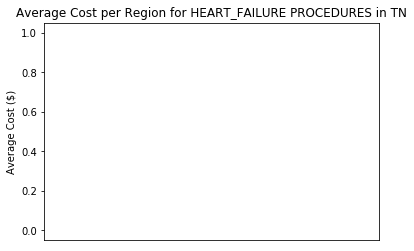

In [64]:
# Create a Bar Chart of the Average Cost per Region for HEART_FAILURE PROCEDURES in TN

drg_HEART_FAILURE_TN_Average_Covered_Charge_List_Values = drg_HEART_FAILURE_TN_Average_Covered_Charge_List
drg_HEART_FAILURE_TN_Region_List_Values = drg_HEART_FAILURE_TN_Region_List
x_axis = np.arange(len(drg_HEART_FAILURE_TN_Region_List))

plt.bar(x_axis, drg_HEART_FAILURE_TN_Average_Covered_Charge_List_Values, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drg_HEART_FAILURE_TN_Region_List_Values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Cost per Region for HEART_FAILURE PROCEDURES in TN")
plt.ylabel("Average Cost ($)")

In [65]:
# Filter the data so that only a specific procedure in Nashville TN is in the dataframe

DataFrame_drg_HEART_FAILURE_TN_Nashville = DataFrame.loc[(DataFrame["DRG Definition"] == "291 - HEART FAILURE & SHOCK W MCC") & (DataFrame["Provider State"] == "TN") & (DataFrame["Hospital Referral Region Description"] == "TN - Nashville"),:]

DataFrame_drg_HEART_FAILURE_TN_Nashville.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Discharges
62548,291 - HEART FAILURE & SHOCK W MCC,440003,SUMNER REGIONAL MEDICAL CENTER,555 HARTSVILLE PIKE,GALLATIN,TN,37066,TN - Nashville,43,$29813.79,$9535.00,$8299.18,43
62549,291 - HEART FAILURE & SHOCK W MCC,440006,SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,72,$44415.09,$9210.45,$8159.65,72
62550,291 - HEART FAILURE & SHOCK W MCC,440007,UNITED REGIONAL MEDICAL CENTER,1001 MCARTHUR ST,MANCHESTER,TN,37355,TN - Nashville,18,$10548.22,$8124.72,$7560.50,18
62552,291 - HEART FAILURE & SHOCK W MCC,440009,CUMBERLAND MEDICAL CENTER,421 S MAIN ST,CROSSVILLE,TN,38555,TN - Nashville,69,$21365.40,$8283.78,$7564.68,69
62553,291 - HEART FAILURE & SHOCK W MCC,440010,WAYNE MEDICAL CENTER,103 J V MANGUBAT DR,WAYNESBORO,TN,38485,TN - Nashville,11,$10580.72,$8719.09,$8313.27,11


In [66]:

# Display a statistical overview of the HEART_FAILURE PROCEDURES Nashville TN DataFrame for reference

DataFrame_drg_HEART_FAILURE_TN_Nashville.describe()

,Provider Id,Provider Zip Code,Total Discharges,Total Discharges
count,33.000000,33.000000,33.000000,33.000000
mean,440097.484848,37536.424242,52.242424,52.242424
std,70.158803,612.432702,44.266261,44.266261
min,440003.000000,37040.000000,11.000000,11.000000
25%,440039.000000,37110.000000,19.000000,19.000000
50%,440082.000000,37207.000000,38.000000,38.000000
75%,440151.000000,38401.000000,72.000000,72.000000
max,440227.000000,38583.000000,181.000000,181.000000


In [67]:
# Calculate the Number of Unique Providers that serviced DRG EXTRACRANIAL PROCEDURES in Nashville TN
Unique_Provider_count_drg_HEART_FAILURE_TN_Nashville = len(DataFrame_drg_HEART_FAILURE_TN_Nashville["Provider Id"].unique())
Unique_Provider_count_drg_HEART_FAILURE_TN_Nashville

33

In [68]:
# Calculate the Total Number of Discharges for DRG HEART_FAILURE PROCEDURES in Nasvhville TN
Discharge_Count_drg_HEART_FAILURE_TN_Nashville = (DataFrame_drg_HEART_FAILURE_TN_Nashville["Total Discharges"].sum())
Discharge_Count_drg_HEART_FAILURE_TN_Nashville

1724

In [69]:

# Cacluate the average covered charges for DRG HEART_FAILURE PROCEDURES in Nashville TN
Average_Covered_Charges_drg_HEART_FAILURE_TN_Nashville = DataFrame_drg_HEART_FAILURE_TN_Nashville["Average Covered Charges"].mean()
Average_Covered_Charges_drg_HEART_FAILURE_TN_Nashville

KeyError: 'Average Covered Charges'

In [70]:

# Cacluate the min covered charge amount for DRG HEART_FAILURE PROCEDURES in Nashville TN
Min_Covered_Charges_drg_HEART_FAILURE_TN_Nashville = DataFrame_drg_HEART_FAILURE_TN_Nashville["Average Covered Charges"].min()
Min_Covered_Charges_drg_HEART_FAILURE_TN_Nashville

KeyError: 'Average Covered Charges'

In [71]:
# Cacluate the max covered charge amount for DRG HEART_FAILURE PROCEDURES in Nashville TN
Max_Covered_Charges_drg_HEART_FAILURE_TN_Nashville = DataFrame_drg_HEART_FAILURE_TN_Nashville["Average Covered Charges"].max()
Max_Covered_Charges_drg_HEART_FAILURE_TN_Nashville

KeyError: 'Average Covered Charges'

In [72]:
# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES in Nashville TN
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN_Nashville = len(DataFrame_drg_HEART_FAILURE_TN_Nashville["Provider Zip Code"].unique())
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN_Nashville

33

In [73]:
# Create a summary data frame to hold the DRG HEART_FAILURE PROCEDURES in Nashville TN Analysis Results

DRG_Analysis_df_drg_HEART_FAILURE_TN_Nashville = pd.DataFrame([
    {"Unique Providers that serviced DRG HEART_FAILURE PROCEDURES in Nashville TN": Unique_Provider_count_drg_HEART_FAILURE_TN_Nashville, 
     "Unique Provider Zip Codes that serviced DRG HEART_FAILURE PROCEDURES in Nashville TN": Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN_Nashville, 
     "Total Number of Discharges for DRG HEART_FAILURE PROCEDURES in Nashville TN": Discharge_Count_drg_HEART_FAILURE_TN_Nashville,
     "Average Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN": Average_Covered_Charges_drg_HEART_FAILURE_TN_Nashville,
     "Max Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN": Max_Covered_Charges_drg_HEART_FAILURE_TN_Nashville,
     "Min Charge for DRG HEART_FAILURE PROCEDURES in Nashville TN": Min_Covered_Charges_drg_HEART_FAILURE_TN_Nashville
    }
])
DRG_Analysis_df_drg_HEART_FAILURE_TN_Nashville

NameError: name 'Average_Covered_Charges_drg_HEART_FAILURE_TN_Nashville' is not defined

In [74]:
# Give the displayed data to hold the DRG EXTRACRANIAL PROCEDURES in Nasvhille TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_EXTRACRANIAL_TN_Nashville = DRG_Analysis_df_drg_EXTRACRANIAL_TN_Nashville

DRG_Analysis_Formatted_df_drg_EXTRACRANIAL_TN_Nashville["Average Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_EXTRACRANIAL_TN_Nashville["Average Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_EXTRACRANIAL_TN_Nashville["Max Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_EXTRACRANIAL_TN_Nashville["Max Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_EXTRACRANIAL_TN_Nashville["Min Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_EXTRACRANIAL_TN_Nashville["Min Charge for DRG EXTRACRANIAL PROCEDURES in Nashville TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_EXTRACRANIAL_TN_Nashville

NameError: name 'DRG_Analysis_df_drg_EXTRACRANIAL_TN_Nashville' is not defined

In [75]:
# Create list to store data of the Providers in Nashville for the specific procedure

drg_HEART_FAILURE_TN_Nashville_ProviderList = []

for Provider in DataFrame_drg_HEART_FAILURE_TN_Nashville["Provider Name"]:
    if Provider not in drg_HEART_FAILURE_TN_Nashville_ProviderList:
        drg_HEART_FAILURE_TN_Nashville_ProviderList.append(Provider)
        
drg_HEART_FAILURE_TN_Nashville_ProviderList

['SUMNER REGIONAL MEDICAL CENTER',
 'SKYLINE MEDICAL CENTER',
 'UNITED REGIONAL MEDICAL CENTER',
 'CUMBERLAND MEDICAL CENTER',
 'WAYNE MEDICAL CENTER',
 'HILLSIDE HOSPITAL',
 'WILLIAMSON MEDICAL CENTER',
 'GATEWAY MEDICAL CENTER',
 'VANDERBILT UNIVERSITY HOSPITAL',
 'PERRY COMMUNITY HOSPITAL',
 'HORIZON MEDICAL CENTER',
 'MIDDLE TENNESSEE MEDICAL CENTER INC',
 'SOUTHERN TENNESSEE MEDICAL CENTER',
 'COOKEVILLE REGIONAL MEDICAL CENTER',
 'NORTHCREST MEDICAL CENTER',
 'MAURY REGIONAL HOSPITAL',
 'ST THOMAS HOSPITAL',
 'JAMESTOWN REGIONAL MEDICAL CENTER',
 'METRO NASHVILLE GENERAL HOSPITAL',
 'BAPTIST HOSPITAL',
 'HERITAGE MEDICAL CENTER',
 'HARTON REGIONAL MEDICAL CENTER',
 'STONES RIVER HOSPITAL AND DEKALB COMMUNITY HOSP',
 'SUMMIT MEDICAL CENTER',
 'RIVER PARK HOSPITAL',
 'CENTENNIAL MEDICAL CENTER',
 'CROCKETT HOSPITAL',
 'LIVINGSTON REGIONAL HOSPITAL',
 'WHITE COUNTY COMMUNITY HOSPITAL',
 'UNIVERSITY MEDICAL CENTER',
 'HENDERSONVILLE MEDICAL CENTER',
 'SOUTHERN HILLS MEDICAL CTR',
 'S

In [76]:
# Create list to store data of the Average Charge in Nashville for the specific procedure

drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List = []

for Cost in DataFrame_drg_HEART_FAILURE_TN_Nashville["Average Covered Charges"]:
    if Cost not in drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List:
        drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List.append(Cost)
        
drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List

KeyError: 'Average Covered Charges'

In [77]:
# Create a DataFrame of the Average Cost of HEART_FAILURE per Provider in Nashville by merging the lists
Average_Cost_of_HEART_FAILURE_per_Provider_Nashvile_df = pd.DataFrame({
    "DRG": "291 - HEART FAILURE & SHOCK W MCC",
    "Provider": drg_HEART_FAILURE_TN_Nashville_ProviderList,
    "Average Cost": drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List
})
Average_Cost_of_HEART_FAILURE_per_Provider_Nashvile_df

ValueError: arrays must all be same length

ValueError: shape mismatch: objects cannot be broadcast to a single shape

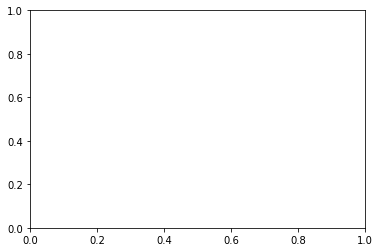

In [78]:
# Create a Bar Chart

AverageCostValue = drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List
ProviderValues = drg_HEART_FAILURE_TN_Nashville_ProviderList
x_axis = np.arange(len(drg_HEART_FAILURE_TN_Nashville_ProviderList))

plt.bar(x_axis, AverageCostValue, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ProviderValues, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Cost per Provider for HEART_FAILURE PROCEDURES in Nashville")
plt.ylabel("Average Cost ($)")